# Convolutional Neural Networks for Image Classification

In [1]:
#Load MNIST Data 
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


##  Visualizing the Image Data

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Training set contains 60,000 samples with 28X28 pixel
x_train.shape

(60000, 28, 28)

In [4]:
#To view first image
single_image = x_train[0]

In [5]:
#single_image

In [6]:
single_image.shape

(28, 28)

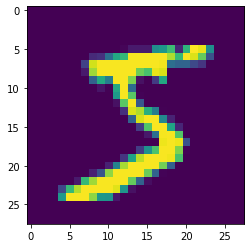

In [7]:
plt.imshow(single_image)

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

## Labels

In [8]:
#Training Labels
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
#Testing Labels
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Looks like our labels are categories of numbers. We need to convert this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis instead of distinct categories.Keras has an easy to use function for this:

In [9]:
from keras.utils.np_utils import to_categorical #Grab y_test and y_train and pass to a categorical function

In [10]:
#Shape of y_train before one hotencoding
y_train.shape

(60000,)

In [11]:
y_example = to_categorical(y_train)

In [12]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [13]:
y_example.shape

(60000, 10)

In [14]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
y_categorical_test = to_categorical(y_test,10)#No of classes is 10(0 to 9)

In [18]:
y_categorical_train = to_categorical(y_train,10)

In [20]:
y_train[0]

5

In [21]:
y_categorical_train[0]#The value is in 5th index positiom

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Processing X Data

Normalizing X data: The value range from (0,255) is converted to range (0,1).

In [24]:
single_image.max()

255

In [25]:
single_image.min()

0

In [26]:
#Divide by Max value
x_train = x_train/255
x_test = x_test/255

In [27]:
scaled_single = x_train[0]

In [28]:
scaled_single.max()

1.0

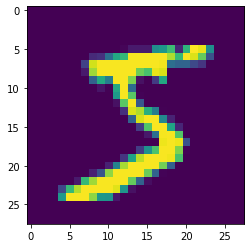

In [29]:
plt.imshow(scaled_single)

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [30]:
x_train.shape

(60000, 28, 28)

In [31]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [32]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [33]:
x_train.shape

(60000, 28, 28, 1)

In [34]:
x_test = x_test.reshape(10000,28,28,1)

In [35]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [39]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER--To reduce no of parameters
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
#To convert 2D to D
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES(OUTPUT LAYER)
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


## Train the Model

In [41]:
# THIS WILL TAKE AWHILE ON MOST COMPUTERS!!!
# CHANGE NUMBER OF EPOCHS IF NECESSARY
# YOUR ACCURACY MAY ALSO BE LOWER THAN WHAT IS SHOWN HERE SINCE THIS WAS TRAINED ON GPU
model.fit(x_train,y_categorical_train,epochs=4)


Epoch 1/4
60000/60000 [==============================] - 17s 288us/step - loss: 0.1332 - accuracy: 0.9593
Epoch 2/4
60000/60000 [==============================] - 18s 292us/step - loss: 0.0488 - accuracy: 0.9857
Epoch 3/4
60000/60000 [==============================] - 16s 271us/step - loss: 0.0350 - accuracy: 0.9896
Epoch 4/4
60000/60000 [==============================] - 16s 274us/step - loss: 0.0278 - accuracy: 0.9919


## Evaluate the Model

In [42]:
model.metrics_names

['loss', 'accuracy']

In [43]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 1s 61us/step


[0.05136929044439303, 0.9858999848365784]

In [44]:
from sklearn.metrics import classification_report

In [45]:
predictions = model.predict_classes(x_test)

In [53]:
# make a prediction
y_train_predict = model.predict_classes(x_train)


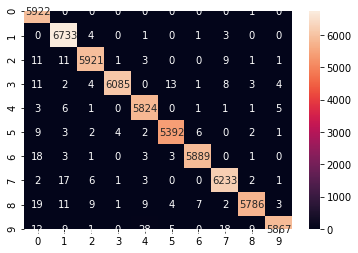

In [54]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cm = confusion_matrix(y_train, y_train_predict)

sns.heatmap(cm, annot=True, fmt="d")

In [55]:
y_categorical_test.shape

(10000, 10)

In [56]:
y_categorical_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [57]:
predictions[0]

7

In [58]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.98       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Looks like the CNN performed quite well!